In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch .__version__

'2.8.0+cu126'

In [ ]:
# y = x^2 -ax -b
constant_a = 4
constant_b = 12

start = 0
stop = 1
step  = 0.02

X = torch.arange(start,stop,step)
y = (X**X) - (constant_a*X) - constant_b

X,y

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([-11.0000, -11.1553, -11.2808, -11.3953, -11.5030, -11.6057, -11.7046,
         -11.8006, -11.8941, -11.9856, -12.0752, -12.1633, -12.2500, -12.3355,
         -12.4198, -12.5032, -12.5855, -12.6670, -12.7477, -12.8277, -12.9069,
         -12.9854, -13.0632, -13.1404, -13.2169, -13.2929, -13.3683, -13.4430,
         -13.5173, -13.5909, -13.6640, -13.7365, -13.8085, -13.8799, -13.9507,
         -14.0209, -14.0906, -14.1597, -14.2283, -14.2962, -14.3635, -14.4302,
         -14.4962, -14.5616, -14.6264, -14.6905, -14.7538, -14.8165, -

In [ ]:
print(X.numel())
print(y.numel())

50
50


In [ ]:
#Divide into train test split
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     prediction = None):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if prediction is not None:
    plt.scatter(test_data,prediction, c='r', s=4, label='Predictions' )

  plt.legend(prop={'size': 14});

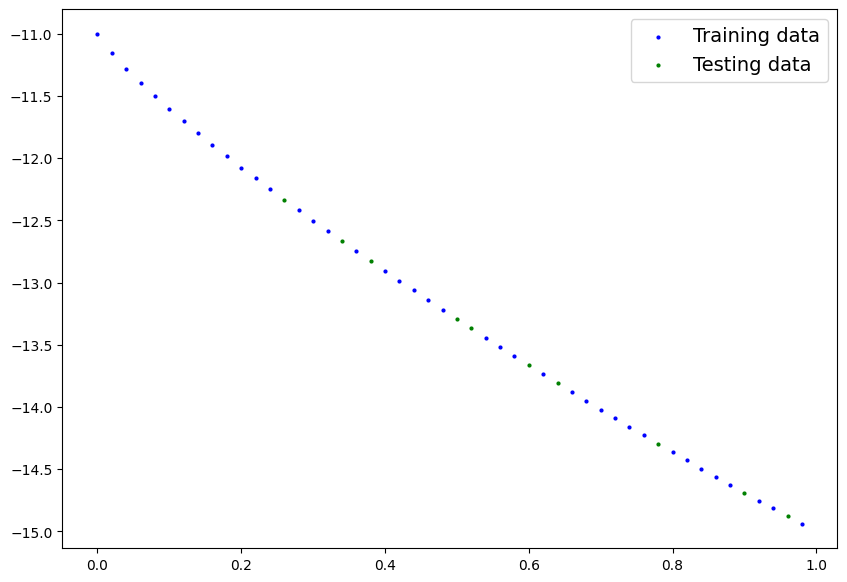

In [ ]:
plot_predictions()

In [ ]:
# Create a model
class CurvedLine(nn.Module):
  def __init__(self):
    super().__init__()
    self.constant_a = nn.Parameter(torch.randn(1, dtype = torch.float))
    self.constant_b = nn.Parameter(torch.randn(1, dtype = torch.float))

  def forward(self, x):
    return (x**x) - (self.constant_a*x) - self.constant_b

In [ ]:
model_0 = CurvedLine()

In [ ]:
print(model_0.state_dict())
list(model_0.parameters())

OrderedDict({'constant_a': tensor([0.2361]), 'constant_b': tensor([-1.1886])})


[Parameter containing:
 tensor([0.2361], requires_grad=True),
 Parameter containing:
 tensor([-1.1886], requires_grad=True)]

In [ ]:
#loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

In [ ]:
#Training the data
epochs = 1000
for epoch in range(epochs):
  model_0.train()
  #do the forward pass
  y_preds = model_0(X_train)
  #calculate the loss
  loss = loss_fn(y_preds,y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  #loss backward
  loss.backward()
  #optimizer step
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    y_preds = model_0(X_test)

    test_loss = loss_fn(y_preds, y_test)



  #print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Train loss: 14.9408 | Test loss: 15.3891
Epoch: 10 | Train loss: 14.8191 | Test loss: 15.2617
Epoch: 20 | Train loss: 14.6974 | Test loss: 15.1344
Epoch: 30 | Train loss: 14.5757 | Test loss: 15.0070
Epoch: 40 | Train loss: 14.4541 | Test loss: 14.8796
Epoch: 50 | Train loss: 14.3324 | Test loss: 14.7522
Epoch: 60 | Train loss: 14.2107 | Test loss: 14.6249
Epoch: 70 | Train loss: 14.0891 | Test loss: 14.4975
Epoch: 80 | Train loss: 13.9674 | Test loss: 14.3701
Epoch: 90 | Train loss: 13.8457 | Test loss: 14.2428
Epoch: 100 | Train loss: 13.7241 | Test loss: 14.1154
Epoch: 110 | Train loss: 13.6024 | Test loss: 13.9880
Epoch: 120 | Train loss: 13.4807 | Test loss: 13.8606
Epoch: 130 | Train loss: 13.3591 | Test loss: 13.7333
Epoch: 140 | Train loss: 13.2374 | Test loss: 13.6059
Epoch: 150 | Train loss: 13.1157 | Test loss: 13.4785
Epoch: 160 | Train loss: 12.9941 | Test loss: 13.3512
Epoch: 170 | Train loss: 12.8724 | Test loss: 13.2238
Epoch: 180 | Train loss: 12.7507 | Test

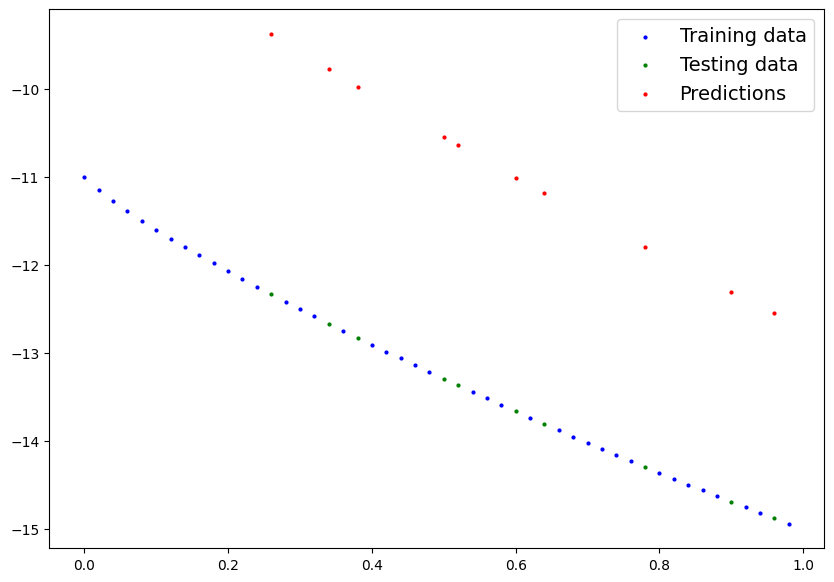

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(prediction=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [ ]:
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2181 Aug 31 19:32 models/01_pytorch_workflow_model_0.pth


In [ ]:
#loading the model
loaded_model_0 = CurvedLine()

#loading the state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])